### Logistic Regression New Algerian Forest

### Problem Statement 1

1. If it is not imbalanced –create a model→90 % accuracy

In [1]:
#importing pandas and numpy
import pandas as pd
import numpy as np

#importing visual libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for Q-Q plot 
import scipy.stats as stats

#To ignore warning
import warnings
warnings.filterwarnings('ignore')

#Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

#save the model
import pickle



In [2]:
# Loading the Algerian Forest data with header 1 and skiping the rows 125,126
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1,skiprows=[124,125,126])
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
df[120:135]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
128,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire
129,8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire


In [4]:
df.shape

(244, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
df.columns = [x.strip() for x in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [8]:
# Adding the region
df['Region']= [1 if i <= 121 else 0 for i in df.index]

In [9]:
# dropping the year columns it has same data throuhout the dataset
df.drop(['year'], axis=1, inplace=True)

In [10]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [11]:
df['Classes'] = df['Classes'].map(lambda x: x.strip())

In [12]:
# finding the missing values
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0


In [14]:
#percenttage of 
df['Classes'].value_counts()/len(df['Classes'])*100

fire        56.557377
not fire    43.442623
Name: Classes, dtype: float64

In [17]:
df['Classes']=df['Classes'].str.replace('not fire','0')
df['Classes']=df['Classes'].str.replace('fire','1')

In [18]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   Temperature  244 non-null    int64  
 3   RH           244 non-null    int64  
 4   Ws           244 non-null    int64  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    float64
 12  Classes      244 non-null    object 
 13  Region       244 non-null    int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [23]:
df['Classes'] = df['Classes'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   Temperature  244 non-null    int64  
 3   RH           244 non-null    int64  
 4   Ws           244 non-null    int64  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    float64
 12  Classes      244 non-null    int32  
 13  Region       244 non-null    int64  
dtypes: float64(7), int32(1), int64(6)
memory usage: 25.9 KB


### Analysis of data

In [25]:
### 0 is not fire and 1 i fire for Classes
### 0 is Bejaia region and 1 is Sidi Bel-abbes region 
data_pie=df.groupby(['Classes','Region']).agg({'Classes':['count']})
data_pie

Classes
                 count
Classes Region        
0       0           43
        1           63
1       0           79
        1           59

<AxesSubplot:ylabel='count'>

<Figure size 504x432 with 0 Axes>

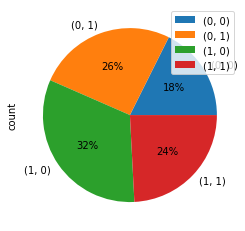

In [27]:
plt.figure(figsize=(7,6))
data_pie.plot(kind = 'pie',y='Classes',autopct='%1.0f%%')

<AxesSubplot:xlabel='Classes', ylabel='count'>

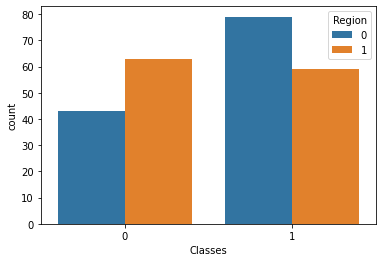

In [30]:
sns.countplot(data= df, x='Classes',hue='Region')

In [32]:
### Getting list of numerical features excluding Classes and Region

numerical_features=[feature for feature in df.columns if feature not in ['Classes', 'Region']]
print(numerical_features)

['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


In [33]:
### Getting uniques values in each features

df[df.columns].nunique()

day             31
month            4
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

In [34]:
# here the assumption to consider a feature discrete is that it should have less than 35 unique values otherwise it will be 
# considered continuous feature

discrete_features=[feature for feature in numerical_features+['Region'] if len(df[feature].unique())<35]
discrete_features

['day', 'month', 'Temperature', 'Ws', 'Region']

### plot for discreate feature and Target feature

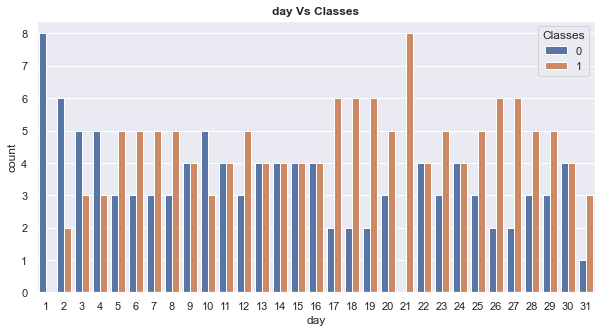

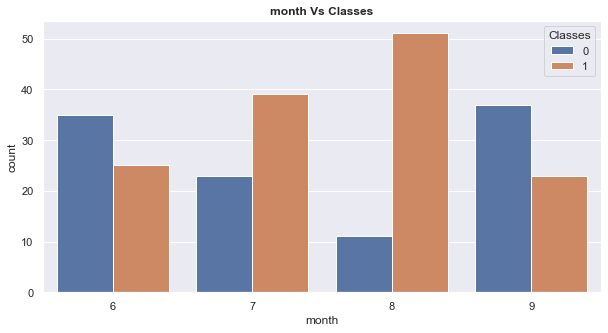

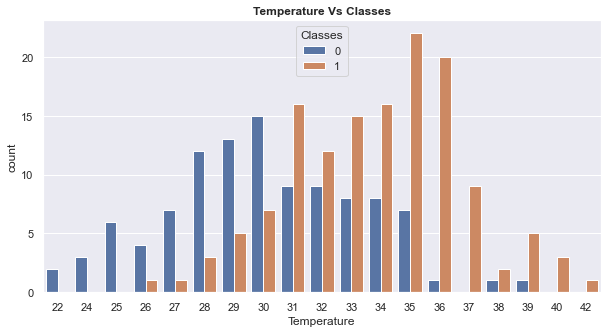

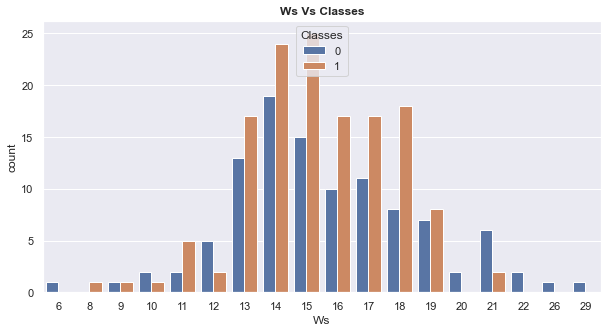

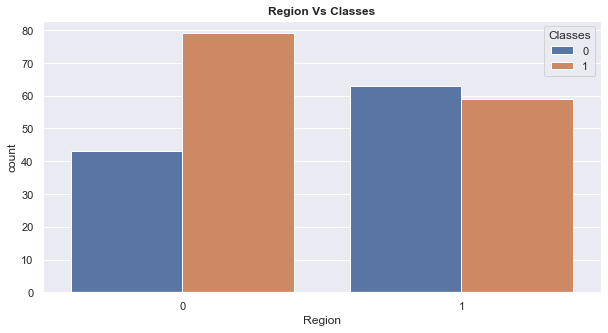

In [35]:
### this is bivariate analysis between target feature classes and discrete numerical features
### for this we plot count plot
for feature in discrete_features:
    sns.set(rc={'figure.figsize':(10,5)})
    sns.countplot(data=df, x=feature, hue='Classes')
    plt.title("{} Vs Classes".format(feature),fontweight="bold")
    plt.show();

#### Observations

From day vs Classes plot it is visible that on almost all days the occurance of fire is there, and its count is more than or equal to the count of no fire cases.
From month vs Classes plot it is visible that july and august month have more cases of occurance of fire as compared to other two months of june and september where occurance of fire is less as compared to no fire.
The month of august has highest no of cases of occurance of fire.
Overall cases of occurance of fire is more than the cases of no occurance of fire.
From temperature vs Classes plot it is visible that temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.
From windspeed vs Classes plot it is visible that for wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.
From Region vs Class plot it is visible that in Bejaia region, the no of cases of occurance of fire is less compared to no fire.
In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire. Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.

Most no of fires occured on 21st of the month.

Least no of fires occured on 2nd of the month.
For most days either fire occured was greater than or equal to no fire occured.

Most no of cases of fire occured are in the month of august and least no of cases of fire occured is in month of september.

July and august have more cases of fire as compared to no fire.
June and september have more cases of no fire as compared to fire.

In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.

In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.
Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.

In [36]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print(continuous_features)

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


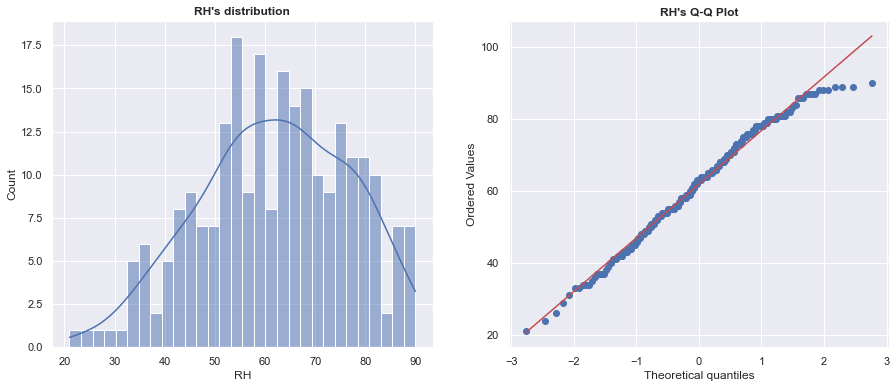

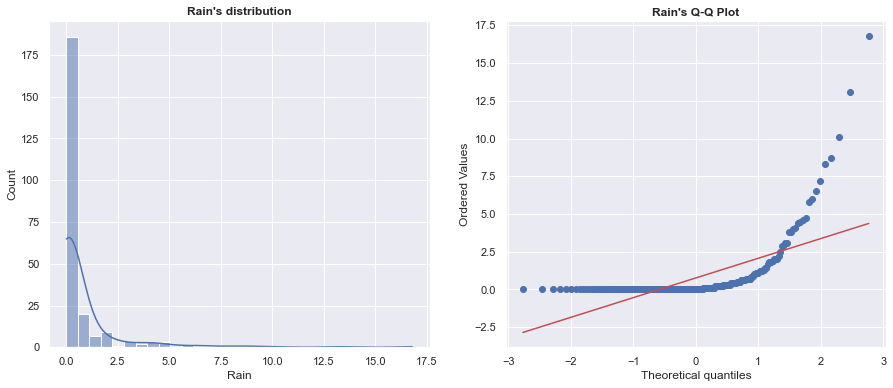

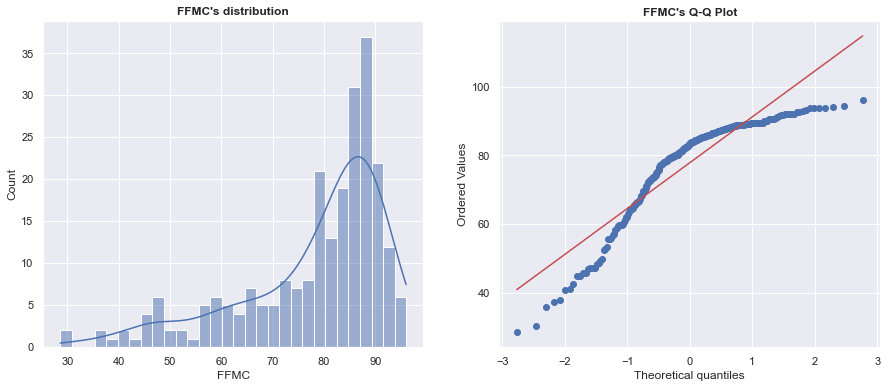

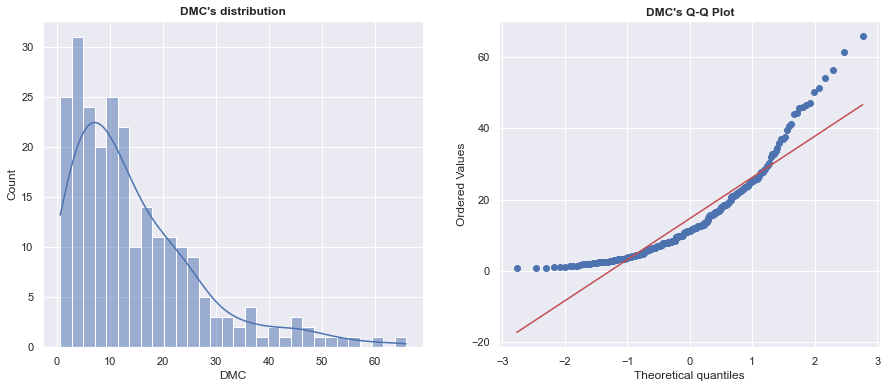

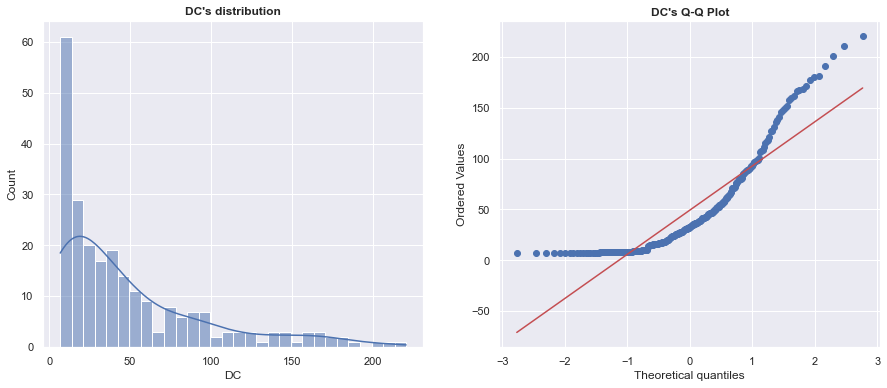

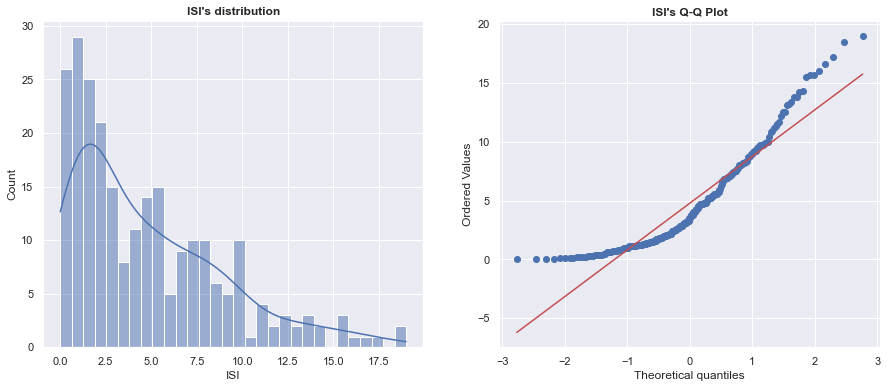

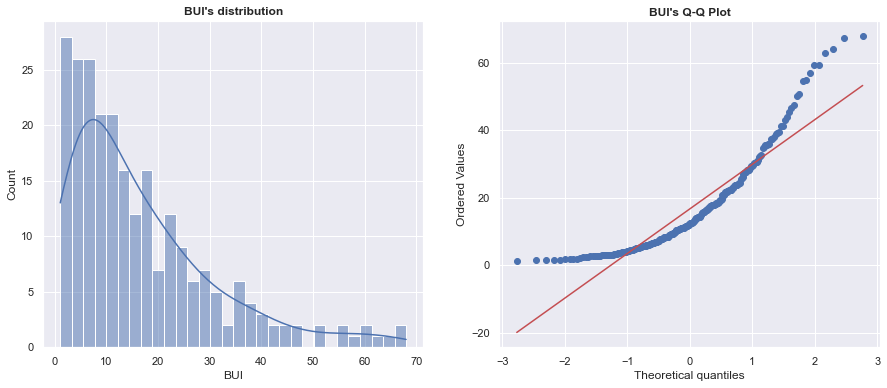

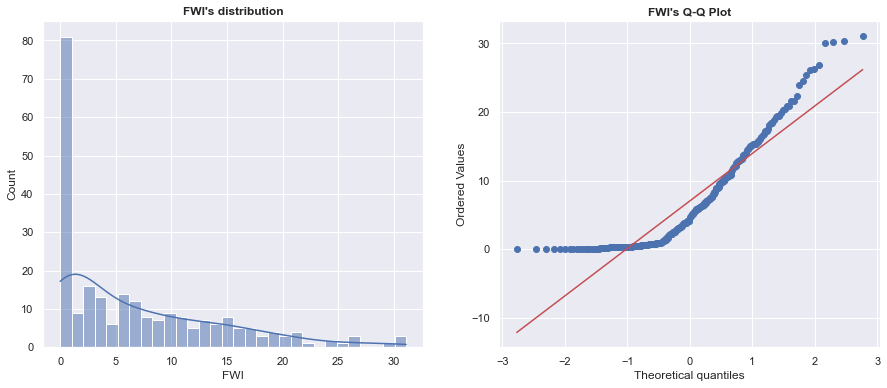

In [37]:
for i in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=df, x=i, kde=True, bins=30)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    
    plt.subplot(122)
    stats.probplot(df[i], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")

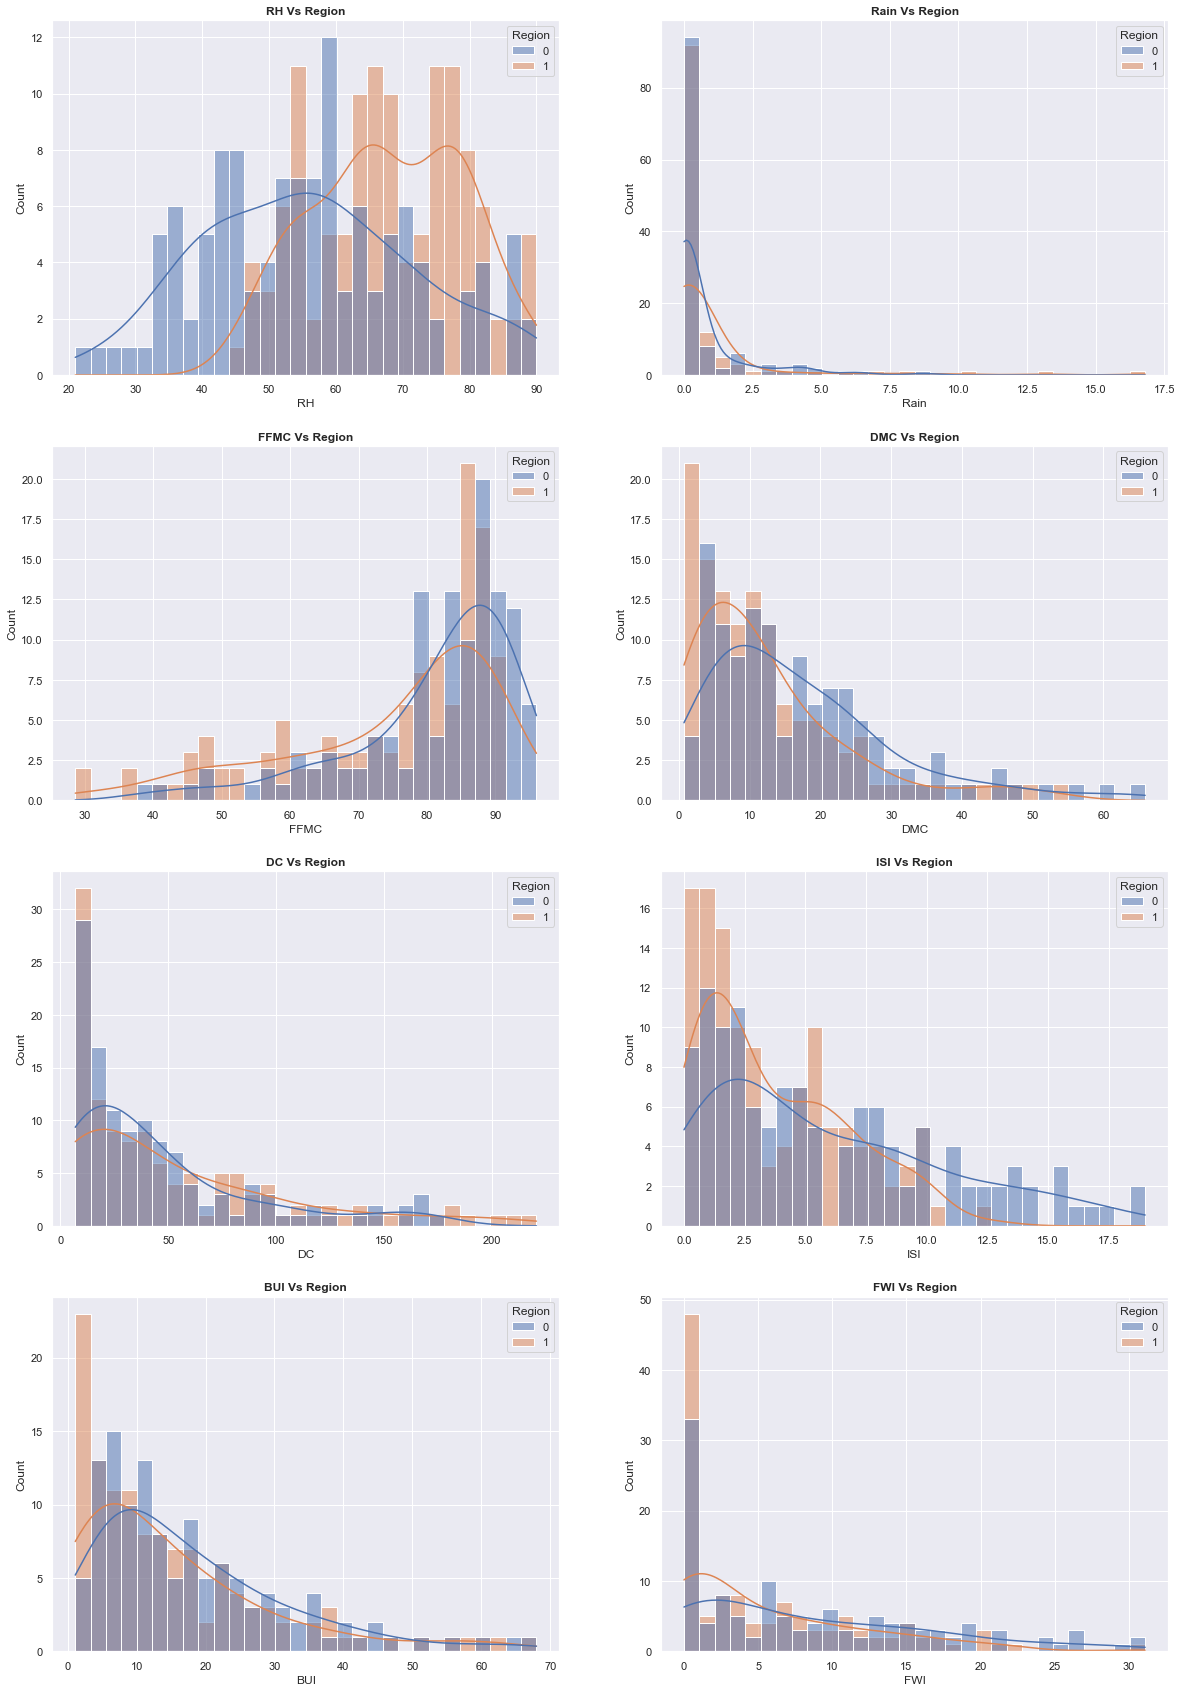

In [38]:
plt.figure(figsize=(20,30))
for i in enumerate(continuous_features):
    plt.subplot(4, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.histplot(data=df, x=i[1], kde=True, bins=30, color='blue', hue='Region')
    plt.title("{} Vs Region".format(i[1]),fontweight="bold")

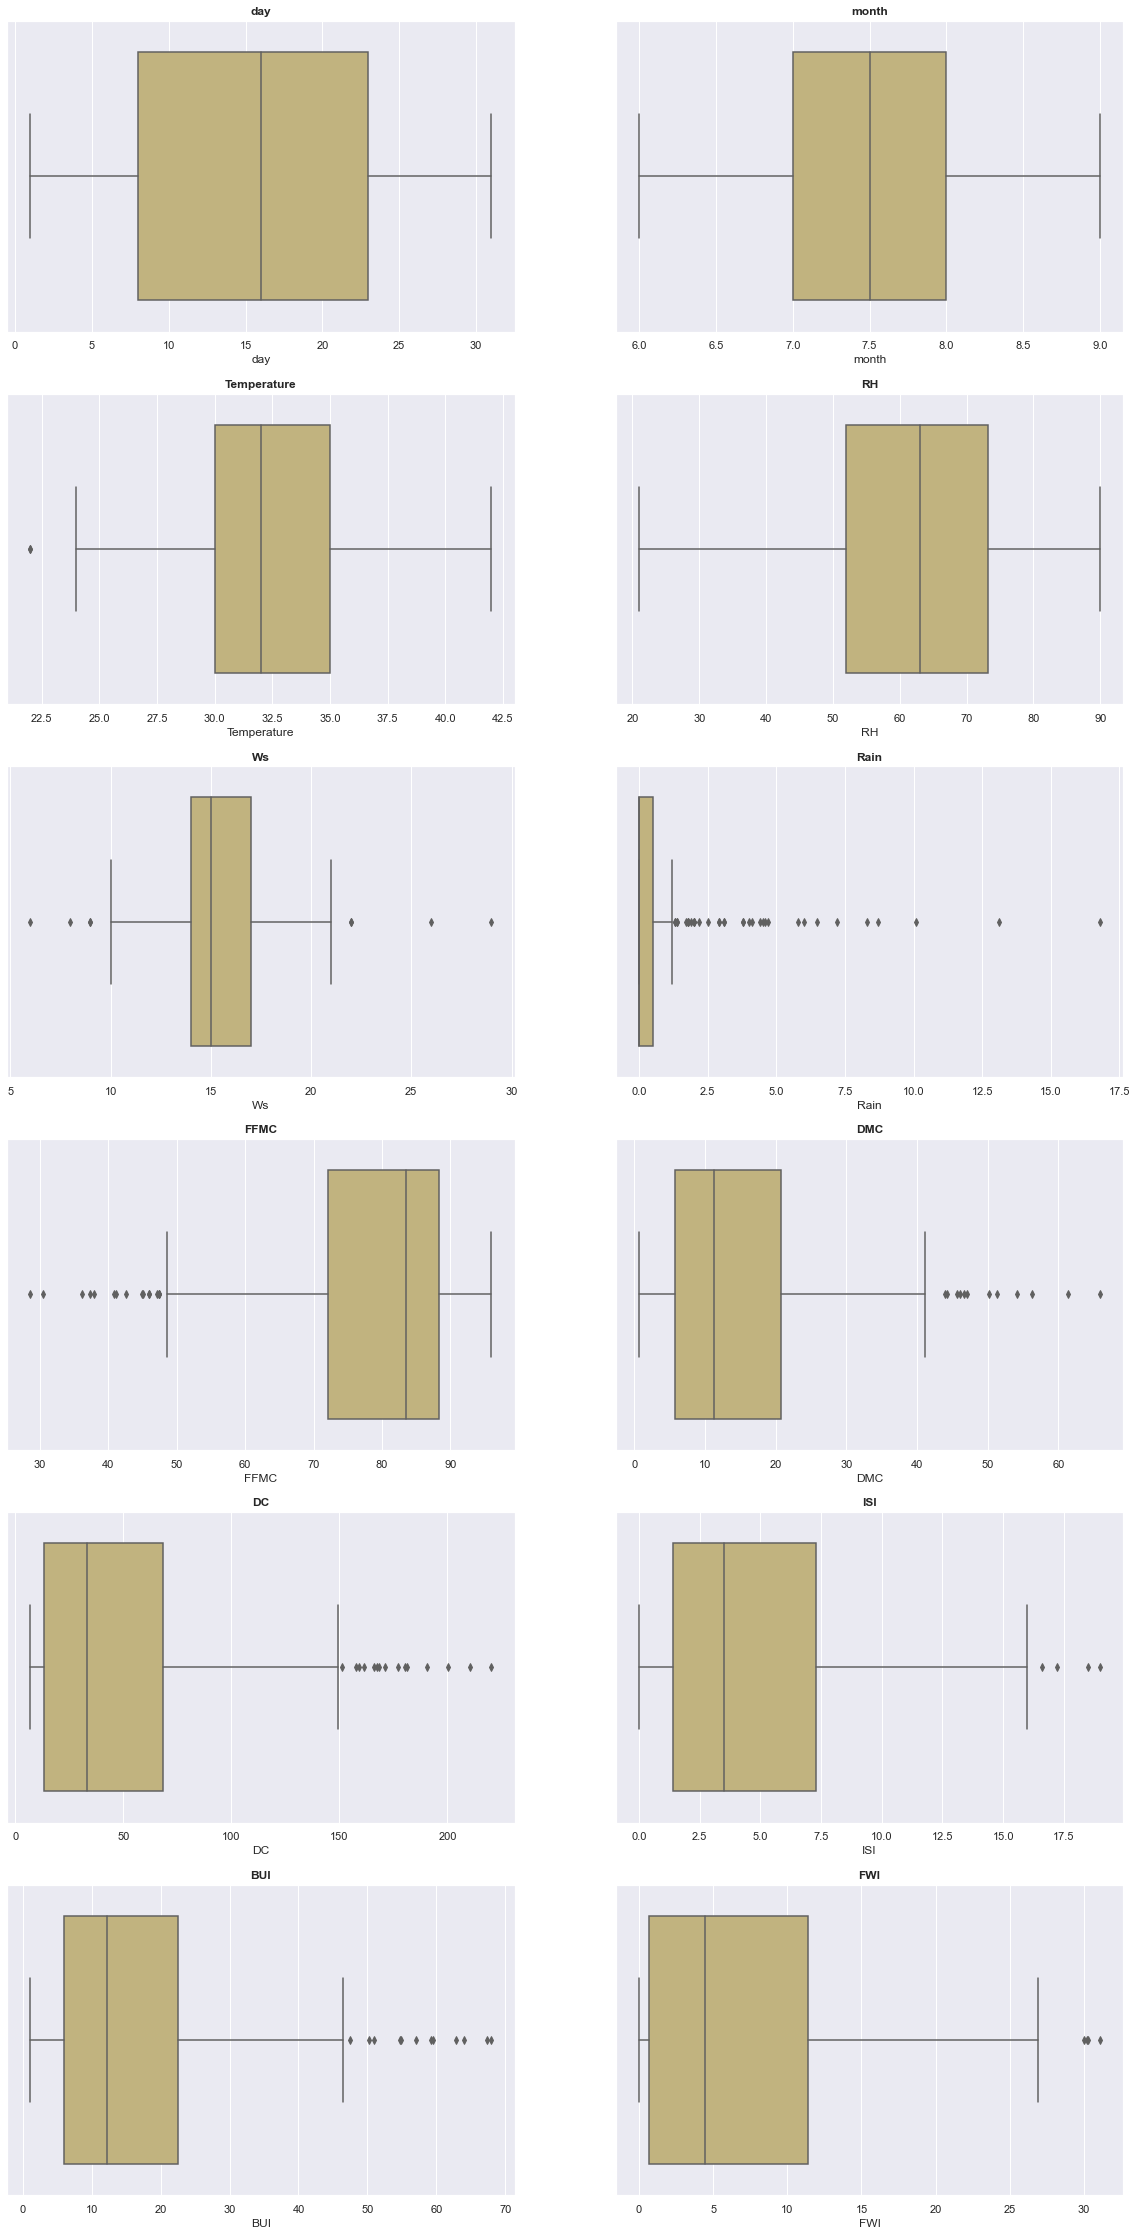

In [39]:
### Checking outliers in numerical features

plt.figure(figsize=(20,40))
for i in enumerate(numerical_features):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.boxplot(data=df, x=i[1], color='y')
    plt.title("{}".format(i[1]), fontweight="bold")

<AxesSubplot:>

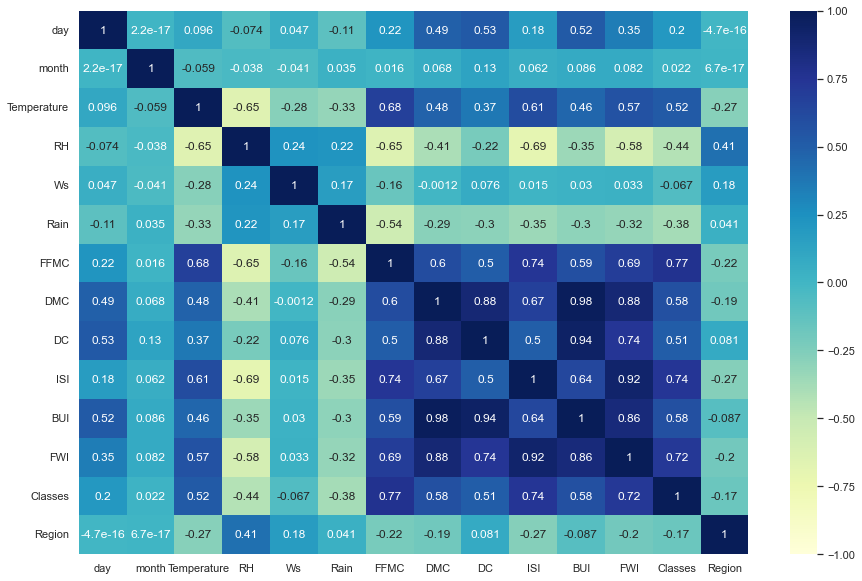

In [41]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=df.corr(), annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

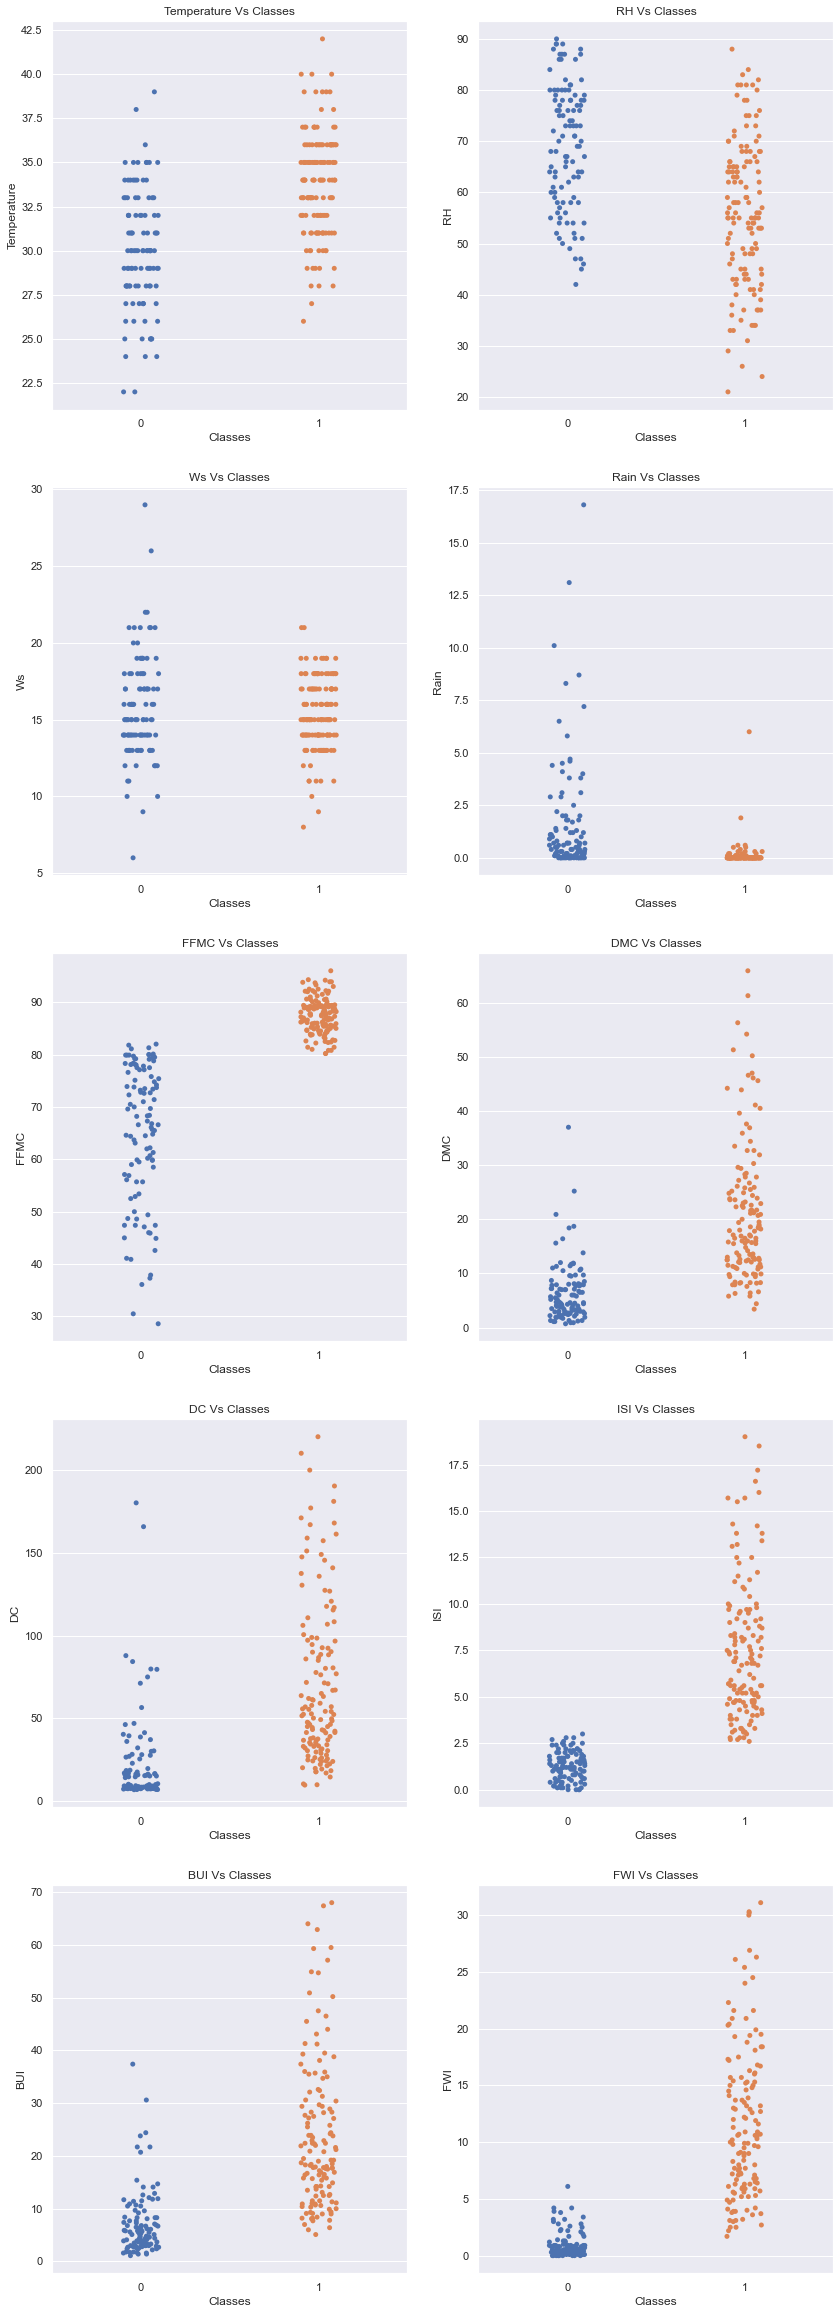

In [42]:
num_feature_custom=[feature for feature in numerical_features if feature not in ['day', 'month']]

plt.figure(figsize=(14,50))
for i in enumerate(num_feature_custom):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,8)})
    sns.stripplot(data=df, y=i[1], x='Classes')
    plt.title("{} Vs Classes".format(i[1]))

__Observations__

It is visible that for temperature between 30 to 37, there is most no of cases of occurance of fire, i.e Hot regions are more prone to forrest fires.

For RH 40 to 70 and wind speed between 13 to 19 Km/h, Most no of cases of occurance of fire is reported, i.e dry regions are more prone to forrest fires.

Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.

For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.
DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.

plt.figure(figsize=(20,50))
for i in enumerate(num_feature_custom):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(data=dataset, x=i[1], y='Classes')
    plt.xlabel(i[1])
    plt.ylabel("Classes")
    plt.title("{} Vs Classes".format(i[1]))

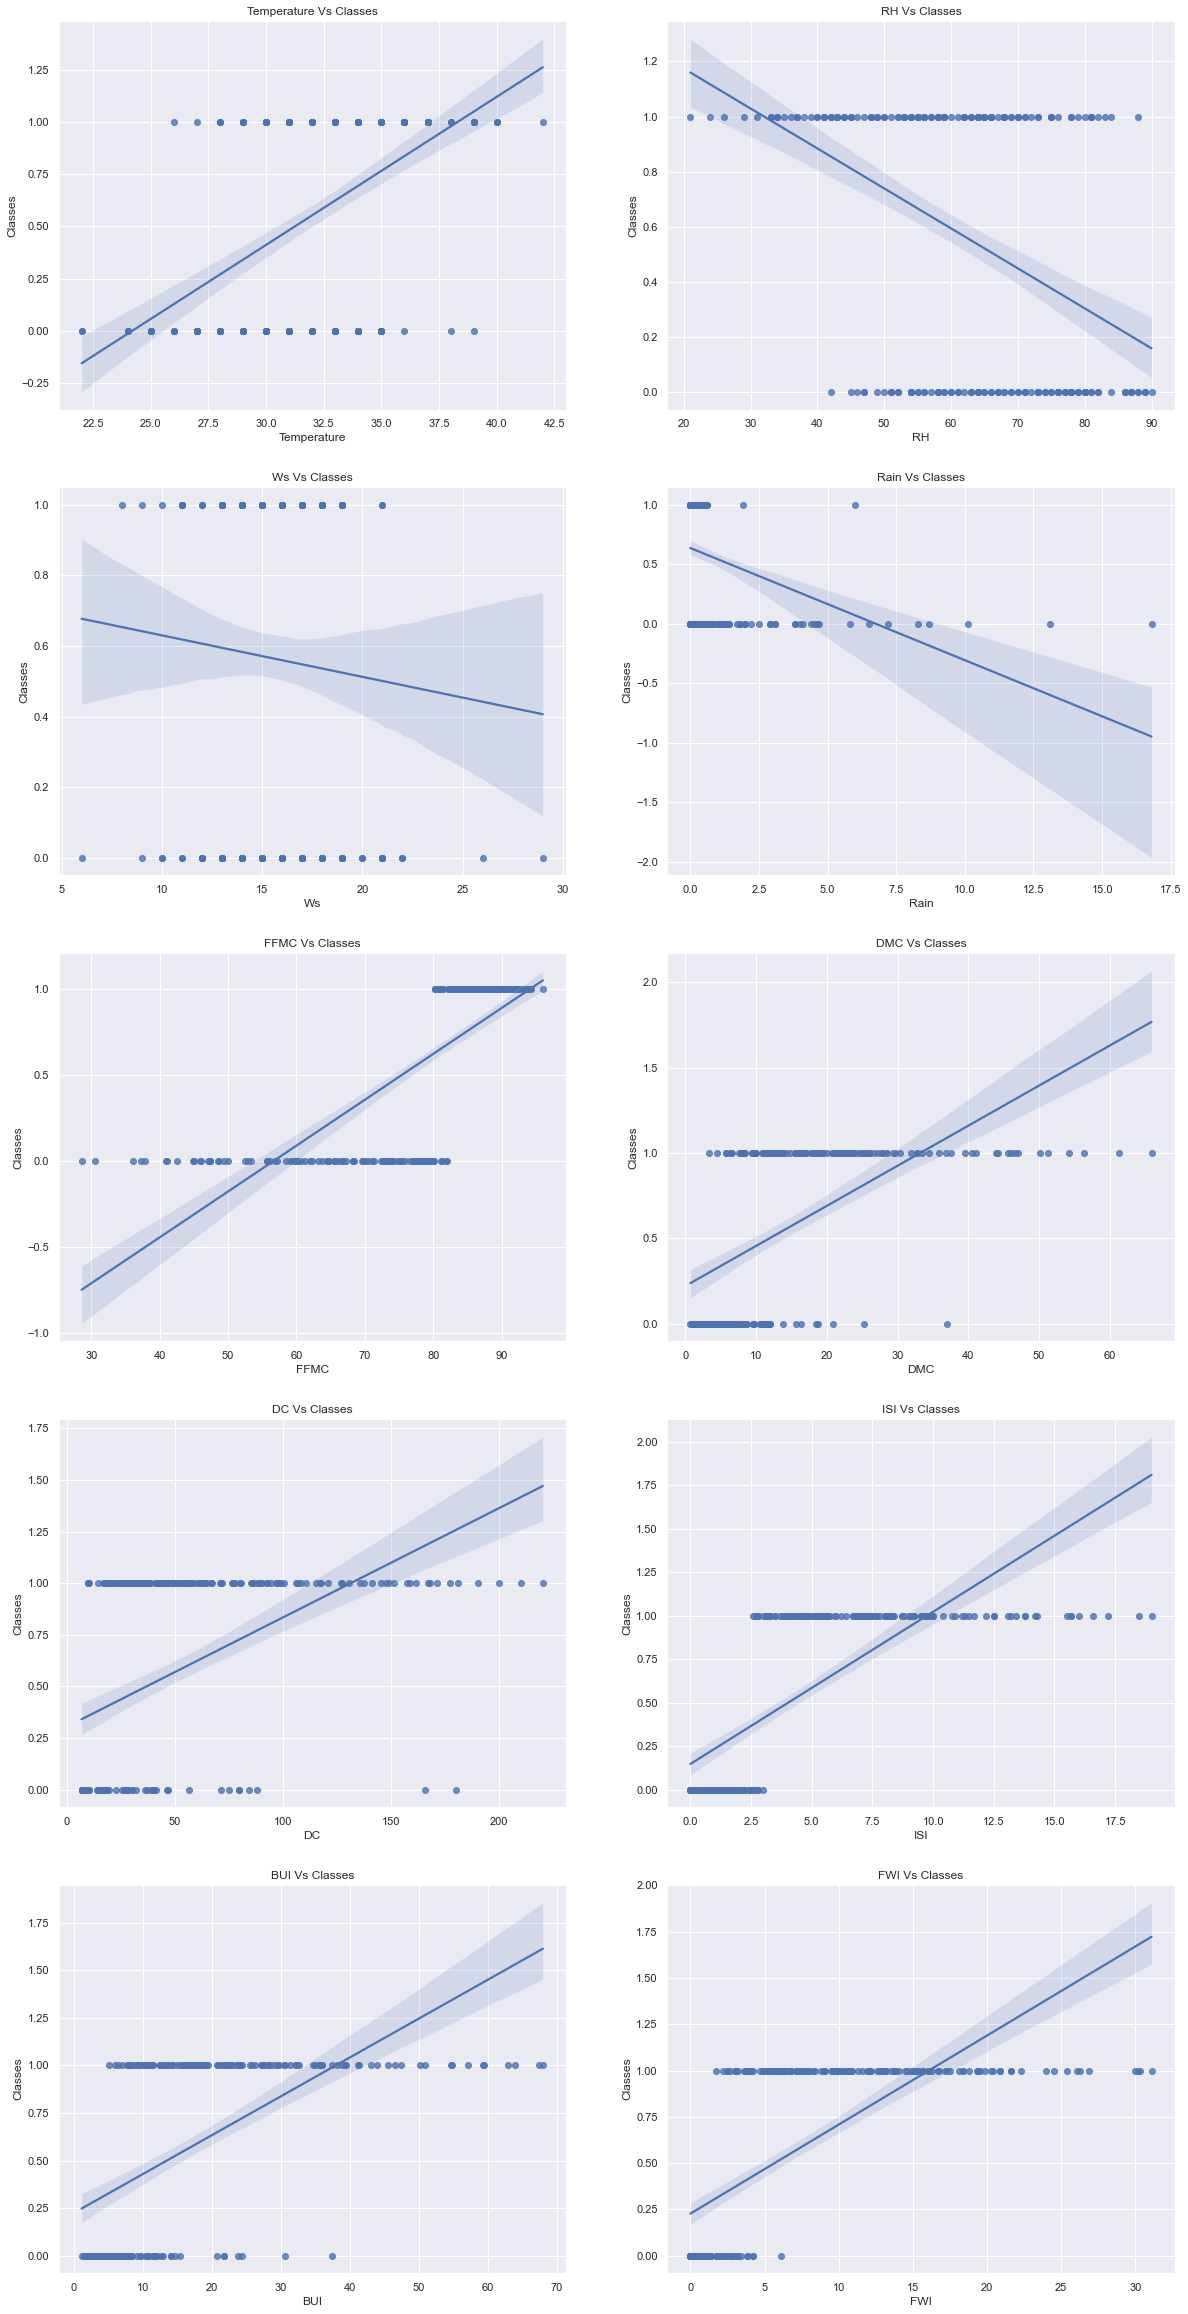

In [43]:
plt.figure(figsize=(20,50))
for i in enumerate(num_feature_custom):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(data=df, x=i[1], y='Classes')
    plt.xlabel(i[1])
    plt.ylabel("Classes")
    plt.title("{} Vs Classes".format(i[1]))

__Final Report__
1. Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
2. Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI
3. Temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.
4. Wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.
5. Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.
6. For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.
7. DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.
8. In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.
7. In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.
8. Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.
9. Most no of cases of fire occured are in the month of august and least no of cases of fire occured is in month of september.
10. July and august have more cases of fire as compared to no fire.
11. June and september have more cases of no fire as compared to fire.
12. Relative Humidity, RH feature doesnt have outliers whereas Temperature, FFMC, wind speed, Rain, DMC,DC, ISI, BUI and FWI have outilers.
13. There is no null vales in dataset.

In [45]:
x_col = ['day', 'month','Temperature','RH', 'Ws', 'Rain', 'FFMC',
        'ISI', 'BUI', 'FWI', 'Region']
print(x_col)
y_col = ['Classes']
print(y_col)

['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'ISI', 'BUI', 'FWI', 'Region']
['Classes']


In [46]:
X = df[x_col]
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,1.3,3.4,0.5,1
1,2,6,29,61,13,1.3,64.4,1.0,3.9,0.4,1
2,3,6,26,82,22,13.1,47.1,0.3,2.7,0.1,1
3,4,6,25,89,13,2.5,28.6,0.0,1.7,0.0,1
4,5,6,27,77,16,0.0,64.8,1.2,3.9,0.5,1


In [47]:
y = df['Classes']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int32

In [48]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [49]:
X_train

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region
237,24,9,26,49,6,2.0,61.3,0.6,11.9,0.4,0
78,18,8,36,54,18,0.0,89.4,9.7,27.5,16.1,1
25,26,6,31,64,18,0.0,86.8,6.7,21.6,10.6,1
124,3,6,29,80,14,2.0,48.7,0.3,2.6,0.1,0
176,25,7,39,64,9,1.2,73.8,1.1,11.4,0.7,0
...,...,...,...,...,...,...,...,...,...,...,...
64,4,8,34,69,13,0.0,85.0,4.0,8.2,3.9,1
15,16,6,29,89,13,0.7,36.1,0.0,2.2,0.0,1
228,15,9,32,51,13,0.0,88.7,6.9,17.8,9.8,0
125,4,6,30,64,14,0.0,79.4,2.2,5.6,1.0,0


In [50]:
### Creating a standard scaler object
scaler=StandardScaler()
scaler

StandardScaler()

In [51]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[ 1.0627621 ,  1.33562856, -1.77085211, ..., -0.32535487,
        -0.86520142, -0.98176139],
       [ 0.34495731,  0.44338489,  1.09557186, ...,  0.76565444,
         1.21536327,  1.01857744],
       [ 1.30203036, -1.34110244, -0.33764012, ...,  0.35302912,
         0.48650303,  1.01857744],
       ...,
       [-0.01394508,  1.33562856, -0.05099773, ...,  0.08727045,
         0.380487  , -0.98176139],
       [-1.32992053, -1.34110244, -0.62428252, ..., -0.76595478,
        -0.78568939, -0.98176139],
       [-0.61211574, -1.34110244, -1.19756732, ..., -0.27639932,
        -0.79894139,  1.01857744]])

In [52]:
X_test = scaler.transform(X_test)

In [53]:
log_reg = LogisticRegression(random_state=0)
log_reg

LogisticRegression(random_state=0)

In [54]:
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [55]:
lg_prd = log_reg.predict(X_test)
lg_prd

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [56]:
cm = confusion_matrix(y_test,lg_prd)
cm

array([[30,  0],
       [ 6, 45]], dtype=int64)

In [57]:
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]
print(tp,fp,fn,tn)

30 0 6 45


In [59]:
#Accuracy Score
accuracy = round(accuracy_score(y_test,lg_prd),4)
print(accuracy)

0.9259


In [60]:
precision_manual=round(tp/(tp+fp),4)
print("Precision of our model is {}".format(precision_manual))

Precision of our model is 1.0


In [61]:
recall_manual=round(tp/(tp+fn),4)
print("Recall of our model is {}".format(recall_manual))

Recall of our model is 0.8333


#### F-1 Score

In [62]:
f1_score=2*(precision_manual*recall_manual)/(precision_manual+recall_manual)
print("F-1 Score of our model is {} ".format(round(f1_score,4)))

F-1 Score of our model is 0.9091 


In [63]:
## Classification Report 
print(classification_report(y_test, lg_prd))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        30
           1       1.00      0.88      0.94        51

    accuracy                           0.93        81
   macro avg       0.92      0.94      0.92        81
weighted avg       0.94      0.93      0.93        81



In [64]:
### Writing model to a file that will be used while deployment
with open('model_Logistic_regression_algerian_ff.sav','wb') as f:
    pickle.dump(log_reg,f)

### Creating the Imbalnce Dataset

In [65]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [66]:
df.shape

(244, 14)

In [67]:
X1 = df[x_col]
X1

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,1.3,3.4,0.5,1
1,2,6,29,61,13,1.3,64.4,1.0,3.9,0.4,1
2,3,6,26,82,22,13.1,47.1,0.3,2.7,0.1,1
3,4,6,25,89,13,2.5,28.6,0.0,1.7,0.0,1
4,5,6,27,77,16,0.0,64.8,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,4.5,16.9,6.5,0
240,27,9,28,87,15,4.4,41.1,0.1,6.2,0.0,0
241,28,9,27,87,29,0.5,45.9,0.4,3.4,0.2,0
242,29,9,24,54,18,0.1,79.7,1.7,5.1,0.7,0


In [69]:
y1 = df['Classes']
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int32

In [70]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X1, y1, test_size=0.10, random_state=17)

In [71]:
X_train_imb

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region
156,5,7,34,45,18,0.0,90.5,11.3,18.7,15.0,0
183,1,8,38,52,14,0.0,78.3,2.0,4.4,0.8,0
11,12,6,26,81,19,0.0,84.0,4.8,17.7,7.1,1
75,15,8,36,55,13,0.3,82.4,3.7,22.0,6.3,1
130,9,6,27,59,18,0.1,78.1,2.4,8.3,1.9,0
...,...,...,...,...,...,...,...,...,...,...,...
150,29,6,37,36,13,0.6,86.2,4.8,17.8,7.2,0
134,13,6,30,52,15,2.0,72.3,1.4,10.9,0.9,0
143,22,6,33,46,14,1.1,78.3,1.9,7.7,1.2,0
241,28,9,27,87,29,0.5,45.9,0.4,3.4,0.2,0


In [72]:
### Replacing all values as 1 in y_train and all values as zero in y_test to create imbalance 

y_train_imb=y_train_imb.replace(0,1)

In [74]:
y_train_imb

156    1
183    1
11     1
75     1
130    1
      ..
150    1
134    1
143    1
241    1
111    1
Name: Classes, Length: 219, dtype: int32

In [75]:
y_test_imb=y_test_imb.replace(1,0)
y_test_imb.head()

48     0
216    0
101    0
38     0
86     0
Name: Classes, dtype: int32

In [76]:
### Combining X_train_imb and y_train_imb
train_imb=X_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region,Classes
156,5,7,34,45,18,0.0,90.5,11.3,18.7,15.0,0,1
183,1,8,38,52,14,0.0,78.3,2.0,4.4,0.8,0,1
11,12,6,26,81,19,0.0,84.0,4.8,17.7,7.1,1,1
75,15,8,36,55,13,0.3,82.4,3.7,22.0,6.3,1,1
130,9,6,27,59,18,0.1,78.1,2.4,8.3,1.9,0,1


In [77]:
### Combining X_test_imb and y_test_imb
test_imb=X_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region,Classes
48,19,7,35,59,17,0.0,88.1,7.7,18.2,10.9,1,0
216,3,9,28,75,16,0.0,82.2,3.3,6.0,2.5,0,0
101,10,9,33,73,12,1.8,59.9,0.7,2.7,0.3,1,0
38,9,7,32,68,14,1.4,66.6,1.1,7.4,0.6,1,0
86,26,8,31,78,18,0.0,85.8,4.7,57.1,13.7,1,0


In [78]:
### Checking shape of imbalance dataset
train_imb.shape, test_imb.shape

((219, 12), (25, 12))

In [79]:
### Combining train_imb dataset and test_imb dataset into data_imb dataset 
data_imb=pd.concat([train_imb, test_imb], ignore_index=True, sort=False)

In [80]:
data_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region,Classes
0,5,7,34,45,18,0.0,90.5,11.3,18.7,15.0,0,1
1,1,8,38,52,14,0.0,78.3,2.0,4.4,0.8,0,1
2,12,6,26,81,19,0.0,84.0,4.8,17.7,7.1,1,1
3,15,8,36,55,13,0.3,82.4,3.7,22.0,6.3,1,1
4,9,6,27,59,18,0.1,78.1,2.4,8.3,1.9,0,1


In [81]:
data_imb.shape

(244, 12)

In [82]:
### there is imbalence in our dataset
data_imb.Classes.value_counts()

1    219
0     25
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

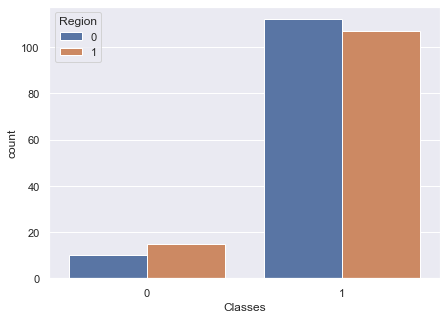

In [83]:
### 0 is not fire and 1 i fire for Classes
### 0 is Bejaia region and 1 is Sidi Bel-abbes region 
plt.figure(figsize=(7,5))
sns.countplot(data=data_imb, x='Classes', hue='Region')

In [84]:
data_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region,Classes
0,5,7,34,45,18,0.0,90.5,11.3,18.7,15.0,0,1
1,1,8,38,52,14,0.0,78.3,2.0,4.4,0.8,0,1
2,12,6,26,81,19,0.0,84.0,4.8,17.7,7.1,1,1
3,15,8,36,55,13,0.3,82.4,3.7,22.0,6.3,1,1
4,9,6,27,59,18,0.1,78.1,2.4,8.3,1.9,0,1


In [85]:
X1=data_imb.iloc[:,:-1]
y1=data_imb.iloc[:,-1]

In [86]:
X1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region
0,5,7,34,45,18,0.0,90.5,11.3,18.7,15.0,0
1,1,8,38,52,14,0.0,78.3,2.0,4.4,0.8,0
2,12,6,26,81,19,0.0,84.0,4.8,17.7,7.1,1
3,15,8,36,55,13,0.3,82.4,3.7,22.0,6.3,1
4,9,6,27,59,18,0.1,78.1,2.4,8.3,1.9,0


In [87]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int32

### Handling the Imbalnced Dataset by doing upsampling

In [98]:
!pip install imbalanced-learn


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
### for upsampling
from imblearn.combine import SMOTETomek 

ImportError: cannot import name 'DistanceMetric' from 'sklearn.metrics' (C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [97]:
sm = SMOTETomek()

NameError: name 'SMOTETomek' is not defined